In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy import ndimage

from scipy import stats

from matplotlib import pyplot as plt


# Functions to Load & Show Image
### To show an image, use show_img() instead of cv2.imshow

In [10]:
def load_img_from_dir(img_dir):
    img = cv2.imread(img_dir)
    return img

def show_img(img):
    return plt.imshow(img)

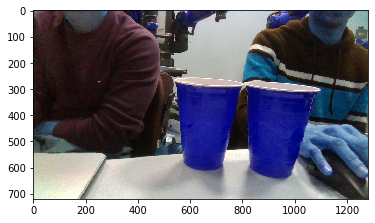

In [11]:
# Example
img1 = load_img_from_dir('img1_Color.png')
show_img(img1)

# Cup Detect Code
### Note, I had to replace cv2.imshow with show_img(). Remember this before copying and pasting back into cup_detect.py

In [214]:
#Cropping parameters
width_low = 0.15
width_high = 0.25

height_low = 0.45
height_high = 0.9

#Crops image
def crop_img(img):
    height, width, channels = img.shape
    img_use = np.zeros(img.shape,np.uint8)
    width_lower = int(width*width_low)
    width_higher = int(width*width_high)
    height_lower = int(height*height_low)
    height_higher = int(height*height_high)

    img_portion = img[width_lower:width_higher,height_lower:height_higher]
    img_use[width_lower:width_higher,height_lower:height_higher] = img_portion
    #show_img(img_use)
    return img_use

# Filters red and white parts
def color_threshold(img):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
    mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))
    lower_white = np.array([0,0,168])
    upper_white = np.array([230,240,255])
    mask3 = cv2.inRange(img_hsv,lower_white,upper_white)
    mask = cv2.bitwise_or(mask1,mask2)
    mask = cv2.bitwise_or(mask3,mask)
    output = cv2.bitwise_and(img,img,mask=mask)

    kernel = np.ones([2,2])
    img_erosion = cv2.erode(output,kernel,iterations=5)
    output = cv2.dilate(img_erosion,kernel,iterations=3)

    show_img(output)

    return output

def edge_detection(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.bilateralFilter(gray_img,7,50,20)
    edges_of_img = cv2.Canny(blurred_img,0,100)
    
    #show_img(edges_of_img)
    return edges_of_img



#Finds rim of cup contour
#Add circle detection!!!
def contour_detection(img):
    contours, hierachy = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    circle_contours = contours
    
    centers = []
    for cnt in circle_contours:
        M = cv2.moments(cnt)
        x = int(M["m10"] / M["m00"])
        y = int(M["m01"] / M["m00"])
        centers.append((x,y))
    return circle_contours,centers

#Creates an image where pixel value is 0 (black) if not inside a cup rim
# O.w. the pixel value is white (255,255,255)
def binarize_img(img,contour_lst,centers):
    blank_img = np.zeros_like(img)
    cv2.drawContours(blank_img, contour_lst, -1, (255,255,255))
    for position in centers:
        cv2.circle(blank_img, position, 7, (0, 255, 0), -1)
        
    #show_img(blank_img)
    return blank_img



# Returns contours of rim of cups
def find_cup(img):
    cropped_img = crop_img(img)
    filtered_img = color_threshold(cropped_img)
    edges_of_img = edge_detection(filtered_img)
    contours,centers = contour_detection(edges_of_img)
    binary = binarize_img(img, contours,centers)
    #show_img(binary)
    return binary


def main():
    img = cv2.imread("img2_Color.png")
    result = find_cup(img)
    #result = crop_img(img)
    #show_img(result)
    return result

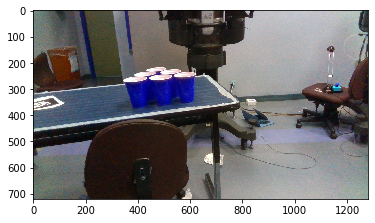

In [215]:
img = cv2.imread("img2_Color.png")
show_img(img)

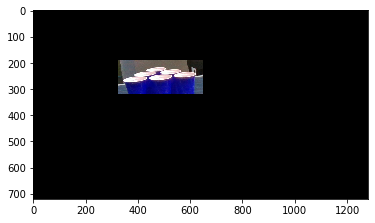

In [216]:
show_img(crop_img(img))

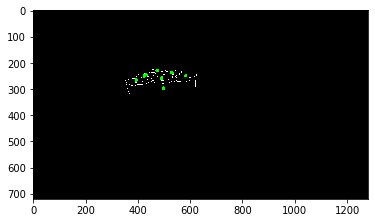

In [217]:
result = main()
show_img(result)